# Python scripting for GBR Source Models

## Overview

* What do we mean by scripting?
* Why script?
* Why Python?
* What's involved?
  * Post processing results
  * Running simulations
* Overview of workshop

## What do we mean by scripting?

* Replacing manual tasks (in Source, in Excel, in Arc) with programs - typically short programs
* For example, running a number of scenarios, with a simulation, contributor and post process step for each

```
scenarios = ['Pre Development','Baseline','Current']
for s in scenarios:
    run_scenario(s)
    run_contributor(s)
    compute_mass_balance(s)
```

In practice there is more to it... but its possible to make things simpler over time.

## Why script?

A few motivations:

* Automate repetitive tasks
* Share common approaches across the team
* Facilitate trickier analyses

Broad categories:

* Post process results, eg
  * Generate standard reports
  * Compare modelled and observed datasets
* Modify and run model, eg
  * Bulk change parameters and run simulation
  * Apply different management scenario
  * Disable some model components and run


## Why Python?

* Python is a very popular, general purpose programming language
* Gets used on a wide range of systems, from the very simple to the massive
* Big following in scientific computing
  * Lots of pre-built modules that make our task much easier
* Nice environment (IPython/Jupyter notebook)
  * Combine script actions, record of results, documentation
  * Execute a little or a lot in at a time. Come back later and rerun
  * Inspired by Matlab
  * Free / Open source
  * Improving rapidly
  * __For example, built in graphing__
  

Populating the interactive namespace from numpy and matplotlib


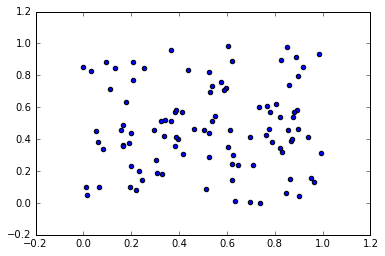

In [7]:
%pylab inline
xs = np.random.uniform(size=100)
ys = np.random.uniform(size=100)
scatter(xs,ys)

__Explorable__

In [ ]:
# Tab completion
#np.random.

In [ ]:
# Help system
np.random.normal?

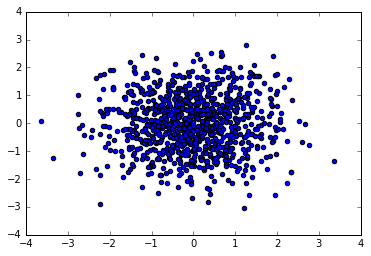

In [9]:
xs = np.random.normal(size=1000)
ys = np.random.normal(size=1000)
scatter(xs,ys)

### Why not R or Matlab?

* R and Matlab each have a very large user base in the math and science communities
* Both could do what we're doing here
* R is open source (like Python), Matlab is commercial
* Subjectively, Python is more useful beyond number crunching
* Python can run directly _within_ Source. Some of the examples will use this
* Python is used in ArcGIS

Personally... I prefer Python over Matlab because Python is free.

I prefer Python over R because I find Python more predictable... ie it has fewer surprises for me. Its different from other programming languages, but I find it is consistent... Things work in similar ways in different situations. R often feels like it has a lots of situations where _'it depends'_. That frustrates me when I jump between different software packages.


## What's involved?

We'll use a few bits of software over the next couple of days, depending on the example.

In every case, we'll use [Jupter/IPython](http://jupyter.org/), which provides the notebook environment.

We have Python installed in Jupyter. That's all handled by [Anaconda Python](https://www.continuum.io/downloads). You can easily install Python on Windows, but historically it's been complicated to get all of the scientific computing libraries set up right... Anaconda makes that easier (but the spatial libraries can still be tricky)

At any rate, Anaconda (which includes Jupyter) is enough to run most of these examples - which deal with the existing Dynamic Sednet results.

![title](Basic.png)

In Python (as in other languages) you use _libraries_ to access pre-built functionality.

In our basic examples, we'll use the GBR library and the Pandas library:

![Python modules](PythonModules.png)

* Pandas is a commonly used library for data analysis. It works really well for tabular data (eg the dynamic sednet CSVs) and time series data. Pandas includes a lot of database/spreadsheet like functionality for filtering, grouping, collating data and for joining data across tables
* GBR is built specifically for this work and includes helper functions for common operations on the dynamic sednet outputs

### Pandas example

In [13]:
import pandas as pd

some_results = pd.read_csv('D:/Fitzroy/Results/Fitzroy Rebuild 2014/Baseline_3818_OrigParams/RawResults.csv')


In [16]:
# First ten rows...
some_results[0:10]

,Constituent,ModelElementType,ModelElement,FU,BudgetElement,Process,Total_Load_in_Kg
0,Atrazine,Catchment,SC #1608,Water,Undefined,Supply,0
1,Diuron,Catchment,SC #1608,Water,Undefined,Supply,0
2,Hexazinone,Catchment,SC #1608,Water,Undefined,Supply,0
3,S-metolachlor,Catchment,SC #1608,Water,Undefined,Supply,0
4,Tebuthiuron,Catchment,SC #1608,Water,Undefined,Supply,0
5,Sediment - Fine,Catchment,SC #1608,Water,Hillslope surface soil,Supply,0
6,Sediment - Fine,Catchment,SC #1608,Water,Hillslope sub-surface soil,Supply,0
7,Sediment - Fine,Catchment,SC #1608,Water,Gully,Supply,0
8,Sediment - Coarse,Catchment,SC #1608,Water,Hillslope surface soil,Supply,0
9,Sediment - Coarse,Catchment,SC #1608,Water,Hillslope sub-surface soil,Supply,0


In [20]:
some_results[(some_results.Constituent=='Sediment - Fine') & (some_results.BudgetElement == 'Gully') & 
             (some_results.FU=='Conservation') & (some_results.Total_Load_in_Kg>0)]

,Constituent,ModelElementType,ModelElement,FU,BudgetElement,Process,Total_Load_in_Kg
72,Sediment - Fine,Catchment,SC #1608,Conservation,Gully,Supply,106831.841870
3361,Sediment - Fine,Catchment,SC #672,Conservation,Gully,Supply,41769.489108
4626,Sediment - Fine,Catchment,SC #1043,Conservation,Gully,Supply,36191.662838
5385,Sediment - Fine,Catchment,SC #1073,Conservation,Gully,Supply,651373.290920
5891,Sediment - Fine,Catchment,SC #1780,Conservation,Gully,Supply,11386.728878
6650,Sediment - Fine,Catchment,SC #1296,Conservation,Gully,Supply,2414.451691
6903,Sediment - Fine,Catchment,SC #92,Conservation,Gully,Supply,2626.447577
7156,Sediment - Fine,Catchment,SC #82,Conservation,Gully,Supply,14830.004665
7409,Sediment - Fine,Catchment,SC #434,Conservation,Gully,Supply,70291.609228
7662,Sediment - Fine,Catchment,SC #1206,Conservation,Gully,Supply,48045.296310


In [22]:
# Example of GBR


#### 1) Tell Python where to find the gbr module
import sys
sys.path.append('../Modules')
import gbr


In [23]:
#### 2) Tell the GBR module where the results are stored
gbr.init('D:/Fitzroy/Results/Fitzroy Rebuild 2014/')

#### 3) Find out what results sets are available
gbr.available()

['Baseline_3818_OrigParams',
 'FROM_ROB',
 'FROM_ROB.zip',
 'TEST_REARRANGE_PARALLEL',
 'TEST_REPORTING_SHORT_RUN',
 'TEST_REPORTING_SPEED',
 'TIMING_WITHOUT_PARAC_WITHOUT_PARAN_WITHOUT_PRERUN_WITHOUT_PARAF',
 'TIMING_WITHOUT_PARAC_WITHOUT_PARAN_WITH_PRERUN_WITHOUT_PARAF',
 'TIMING_WITHOUT_PARAC_WITH_PARAN_WITHOUT_PRERUN_WITHOUT_PARAF',
 'TIMING_WITHOUT_PARAC_WITH_PARAN_WITH_PRERUN_WITHOUT_PARAF',
 'TIMING_WITH_PARAC_WITHOUT_PARAN_WITHOUT_PRERUN_WITHOUT_PARAF',
 'TIMING_WITH_PARAC_WITHOUT_PARAN_WITHOUT_PRERUN_WITH_PARAF',
 'TIMING_WITH_PARAC_WITHOUT_PARAN_WITH_PRERUN_WITHOUT_PARAF',
 'TIMING_WITH_PARAC_WITHOUT_PARAN_WITH_PRERUN_WITH_PARAF',
 'TIMING_WITH_PARAC_WITH_PARAN_WITHOUT_PRERUN',
 'TIMING_WITH_PARAC_WITH_PARAN_WITHOUT_PRERUN_WITHOUT_PARAF',
 'TIMING_WITH_PARAC_WITH_PARAN_WITHOUT_PRERUN_WITH_PARAF',
 'TIMING_WITH_PARAC_WITH_PARAN_WITH_PRERUN',
 'TIMING_WITH_PARAC_WITH_PARAN_WITH_PRERUN_WITHOUT_PARAF',
 'TIMING_WITH_PARAC_WITH_PARAN_WITH_PRERUN_WITH_PARAF']

In [24]:
#### 4) Choose a results set
results = gbr.Results('Baseline_3818_OrigParams')

In [27]:
#### 5) Run a query
results.queries.regional_export(units='t/y')

SummaryRegion,Boyne River,Calliope River,Curtis Island,Fitzroy River,Shoalwater,Styx River,Waterpark Creek
Constituent,,,,,,,
Atrazine,8.526358e-05,2.579299e-05,0.000000e+00,9.456756e-02,0.000000e+00,5.453042e-04,1.435780e-04
Diuron,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Flow,1.700194e+08,3.664106e+08,1.925729e+08,5.357460e+09,1.288707e+09,9.358501e+08,9.434370e+08
Hexazinone,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
N_DIN,3.291517e+01,8.058044e+01,3.367752e+01,1.091061e+03,1.929633e+02,1.848958e+02,1.362680e+02
N_DON,6.666403e+01,1.631179e+02,6.801317e+01,2.123116e+03,3.899967e+02,3.739317e+02,2.759172e+02
N_Particulate,3.913784e+01,3.261677e+02,3.012583e+01,3.937162e+03,3.220557e+02,4.500267e+02,5.639165e+02
P_DOP,4.161436e+00,1.018358e+01,4.230449e+00,1.352702e+02,2.429864e+01,2.324490e+01,1.724135e+01
P_FRP,2.180926e+01,5.335711e+01,2.212802e+01,6.955815e+02,1.271379e+02,1.216827e+02,9.031548e+01


### Running Source (and other tools) from Python

We can use the Python tools to modify the model (eg change parameters), run the model and then deal with the new results. We can also run other tools, like regional contributor from the scripts.

To do this, we need Source running with an extra plugin (Veneer). We also use another Python module (veneer-py)

![With Veneer](PythonAndVeneer.png)

Veneer is a Plugin DLL for Source, loaded in the same way as Dynamic Sednet. Veneer was originally built to support building web based front ends for Source, but its also useful for scripting with languages like Python.

Under the hood, Python and Veneer talk over the network -- even if they are both running on the same PC. But this does mean that you can run Source on one computer and Python on another.

![Remote access](Remote.png)









## Examples

* [PythonIntro.ipynb](PythonIntro.ipynb)
* **Basic Reports**
  * [RegionalExport.ipynb](RegionalExport.ipynb)
  * [SupplyByLandusePerHa.ipynb](SupplyByLandusePerHa.ipynb)
  * [MassBalanceAnnualLoad.ipynb](MassBalanceAnnualLoad.ipynb)
  * [CompareMeanAnnualLoads.ipynb](CompareMeanAnnualLoads.ipynb) **???**
  * [CompareWithObservedLoads.ipynb](CompareWithObservedLoads.ipynb)
  * [Comparison.ipynb](Comparison.ipynb)
  * [MassBalance.ipynb](MassBalance.ipynb)
  * [Timeseries_Predicted_v_Observed.ipynb](Timeseries_Predicted_v_Observed.ipynb)
* **Reports Needing Veneer**
  * [Contributor.ipynb](Contributor.ipynb)
  * [RunContributor.ipynb](RunContributor.ipynb)
  * [SpatialExample.ipynb](SpatialExample.ipynb)
* **Running Simulations**
  * [Change_Streambank_Parameters_and_Rerun.ipynb](Change_Streambank_Parameters_and_Rerun.ipynb)
  * [Run_With_Streambank_Only.ipynb](Run_With_Streambank_Only.ipynb)
* **Other**
  * [OpenEditorWindowFromScript.ipynb](OpenEditorWindowFromScript.ipynb)
* []()
* []()
